In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import glob
import numpy as np
import scipy
from scipy import interpolate

In [3]:
col =['X1','X2','Basics','x1_ev','x2_ev','basic_ev','Deltas','electrons','clkcnt',"charge"]
ind = range(1,16,1)


H3x1 = pd.read_csv("./images/x1_x2_H3.txt",header=None)
H3x1.columns = col

H3x1['D/clk'] = H3x1['Deltas']/H3x1['clkcnt']

H3x1['x1_err']= (1/np.sqrt(H3x1['x1_ev']))/H3x1['clkcnt']
H3x1['x2_err']= (1/np.sqrt(H3x1['x2_ev']))/H3x1['clkcnt']
H3x1['d/clk_err']= (1/np.sqrt(H3x1['Deltas']))/H3x1['clkcnt']
H3x1['Basics_err']= (1/np.sqrt(H3x1['basic_ev']))/H3x1['clkcnt']
H3x1['x1_sub']= abs(H3x1['X1']-H3x1['X2'])

H3x1['x1_charge']=H3x1['x1_ev']/H3x1['charge']
H3x1['x2_charge']=H3x1['x2_ev']/H3x1['charge']
H3x1['Basics_charge']=H3x1['basic_ev']/H3x1['charge']
H3x1['x1_err_ch']= (1/np.sqrt(H3x1['x1_ev']))/H3x1['charge']
H3x1['x2_err_ch']= (1/np.sqrt(H3x1['x2_ev']))/H3x1['charge']
H3x1['Basics_err_ch']= (1/np.sqrt(H3x1['basic_ev']))/H3x1['charge']


H3x1['D/p'] = H3x1['Deltas'] / H3x1['x2_ev']
H3x1['D/p_err']=np.sqrt( (1/np.sqrt(H3x1['x2_ev']))**2 + (1/np.sqrt(H3x1['Deltas']))**2 ) 
H3x1['x1/e'] = H3x1['x1_ev'] / H3x1['electrons']
H3x1['x1/e_err']=np.sqrt( (1/np.sqrt(H3x1['x1_ev']))**2 + (1/np.sqrt(H3x1['electrons']))**2 ) 

H3x1.dropna()

#H3x1['x1/B'] =H3x1["x1"]/H3x1['Basics']
#H3x1['x2/B'] =H3x1["x2"]/H3x1['Basics']


H3x1['Kinematic'] =ind

#He3x1 = pd.read_csv('./images/x1_x2_He3.txt',header=None)
#He3x1.columns = col
#He3x1['Kinematic'] =ind


In [94]:
H3x1

,X1,X2,Basics,x1_ev,x2_ev,basic_ev,Deltas,electrons,clkcnt,charge,...,x2_charge,Basics_charge,x1_err_ch,x2_err_ch,Basics_err_ch,D/p,D/p_err,x1/e,x1/e_err,Kinematic
0,6.702740e-06,1.188290e-05,0.001231,1259.0,2232.0,231252.0,2607.0,41729.0,1.878340e+08,31707.1,...,0.070394,7.293382,8.888544e-07,6.675693e-07,6.558443e-08,1.168011,0.028838,0.030171,0.028605,1
1,4.463850e-06,6.775480e-06,0.000782,392.0,595.0,68651.0,665.0,13247.0,8.781660e+07,15319.4,...,0.038840,4.481311,3.296972e-06,2.676084e-06,2.491350e-07,1.117647,0.056431,0.029592,0.051249,2
2,2.891140e-06,3.854850e-06,0.000507,483.0,644.0,84624.0,744.0,17071.0,1.670620e+08,29881.4,...,0.021552,2.831996,1.522739e-06,1.318731e-06,1.150409e-07,1.155280,0.053823,0.028294,0.046141,3
3,1.451170e-06,2.046760e-06,0.000311,307.0,433.0,65795.0,553.0,13824.0,2.115540e+08,36256.4,...,0.011943,1.814714,1.574150e-06,1.325474e-06,1.075273e-07,1.277136,0.064170,0.022208,0.057703,4
4,1.493040e-06,1.363010e-06,0.000202,620.0,566.0,83978.0,744.0,18045.0,4.152590e+08,70615.0,...,0.008015,1.189237,5.687314e-07,5.952437e-07,4.886752e-08,1.314488,0.055775,0.034359,0.040845,5
5,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,1.055220e-06,5.290170e-07,0.000090,750.0,376.0,64102.0,513.0,15151.0,7.107520e+08,127855.0,...,0.002941,0.501365,2.855957e-07,4.033559e-07,3.089203e-08,1.364362,0.067889,0.049502,0.037408,7
7,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,8.056860e-07,2.351050e-07,0.000038,891.0,260.0,41995.0,351.0,10603.0,1.105890e+09,198605.0,...,0.001309,0.211450,1.686829e-07,3.122649e-07,2.457033e-08,1.350000,0.081824,0.084033,0.034880,9
9,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


/home/jbane/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


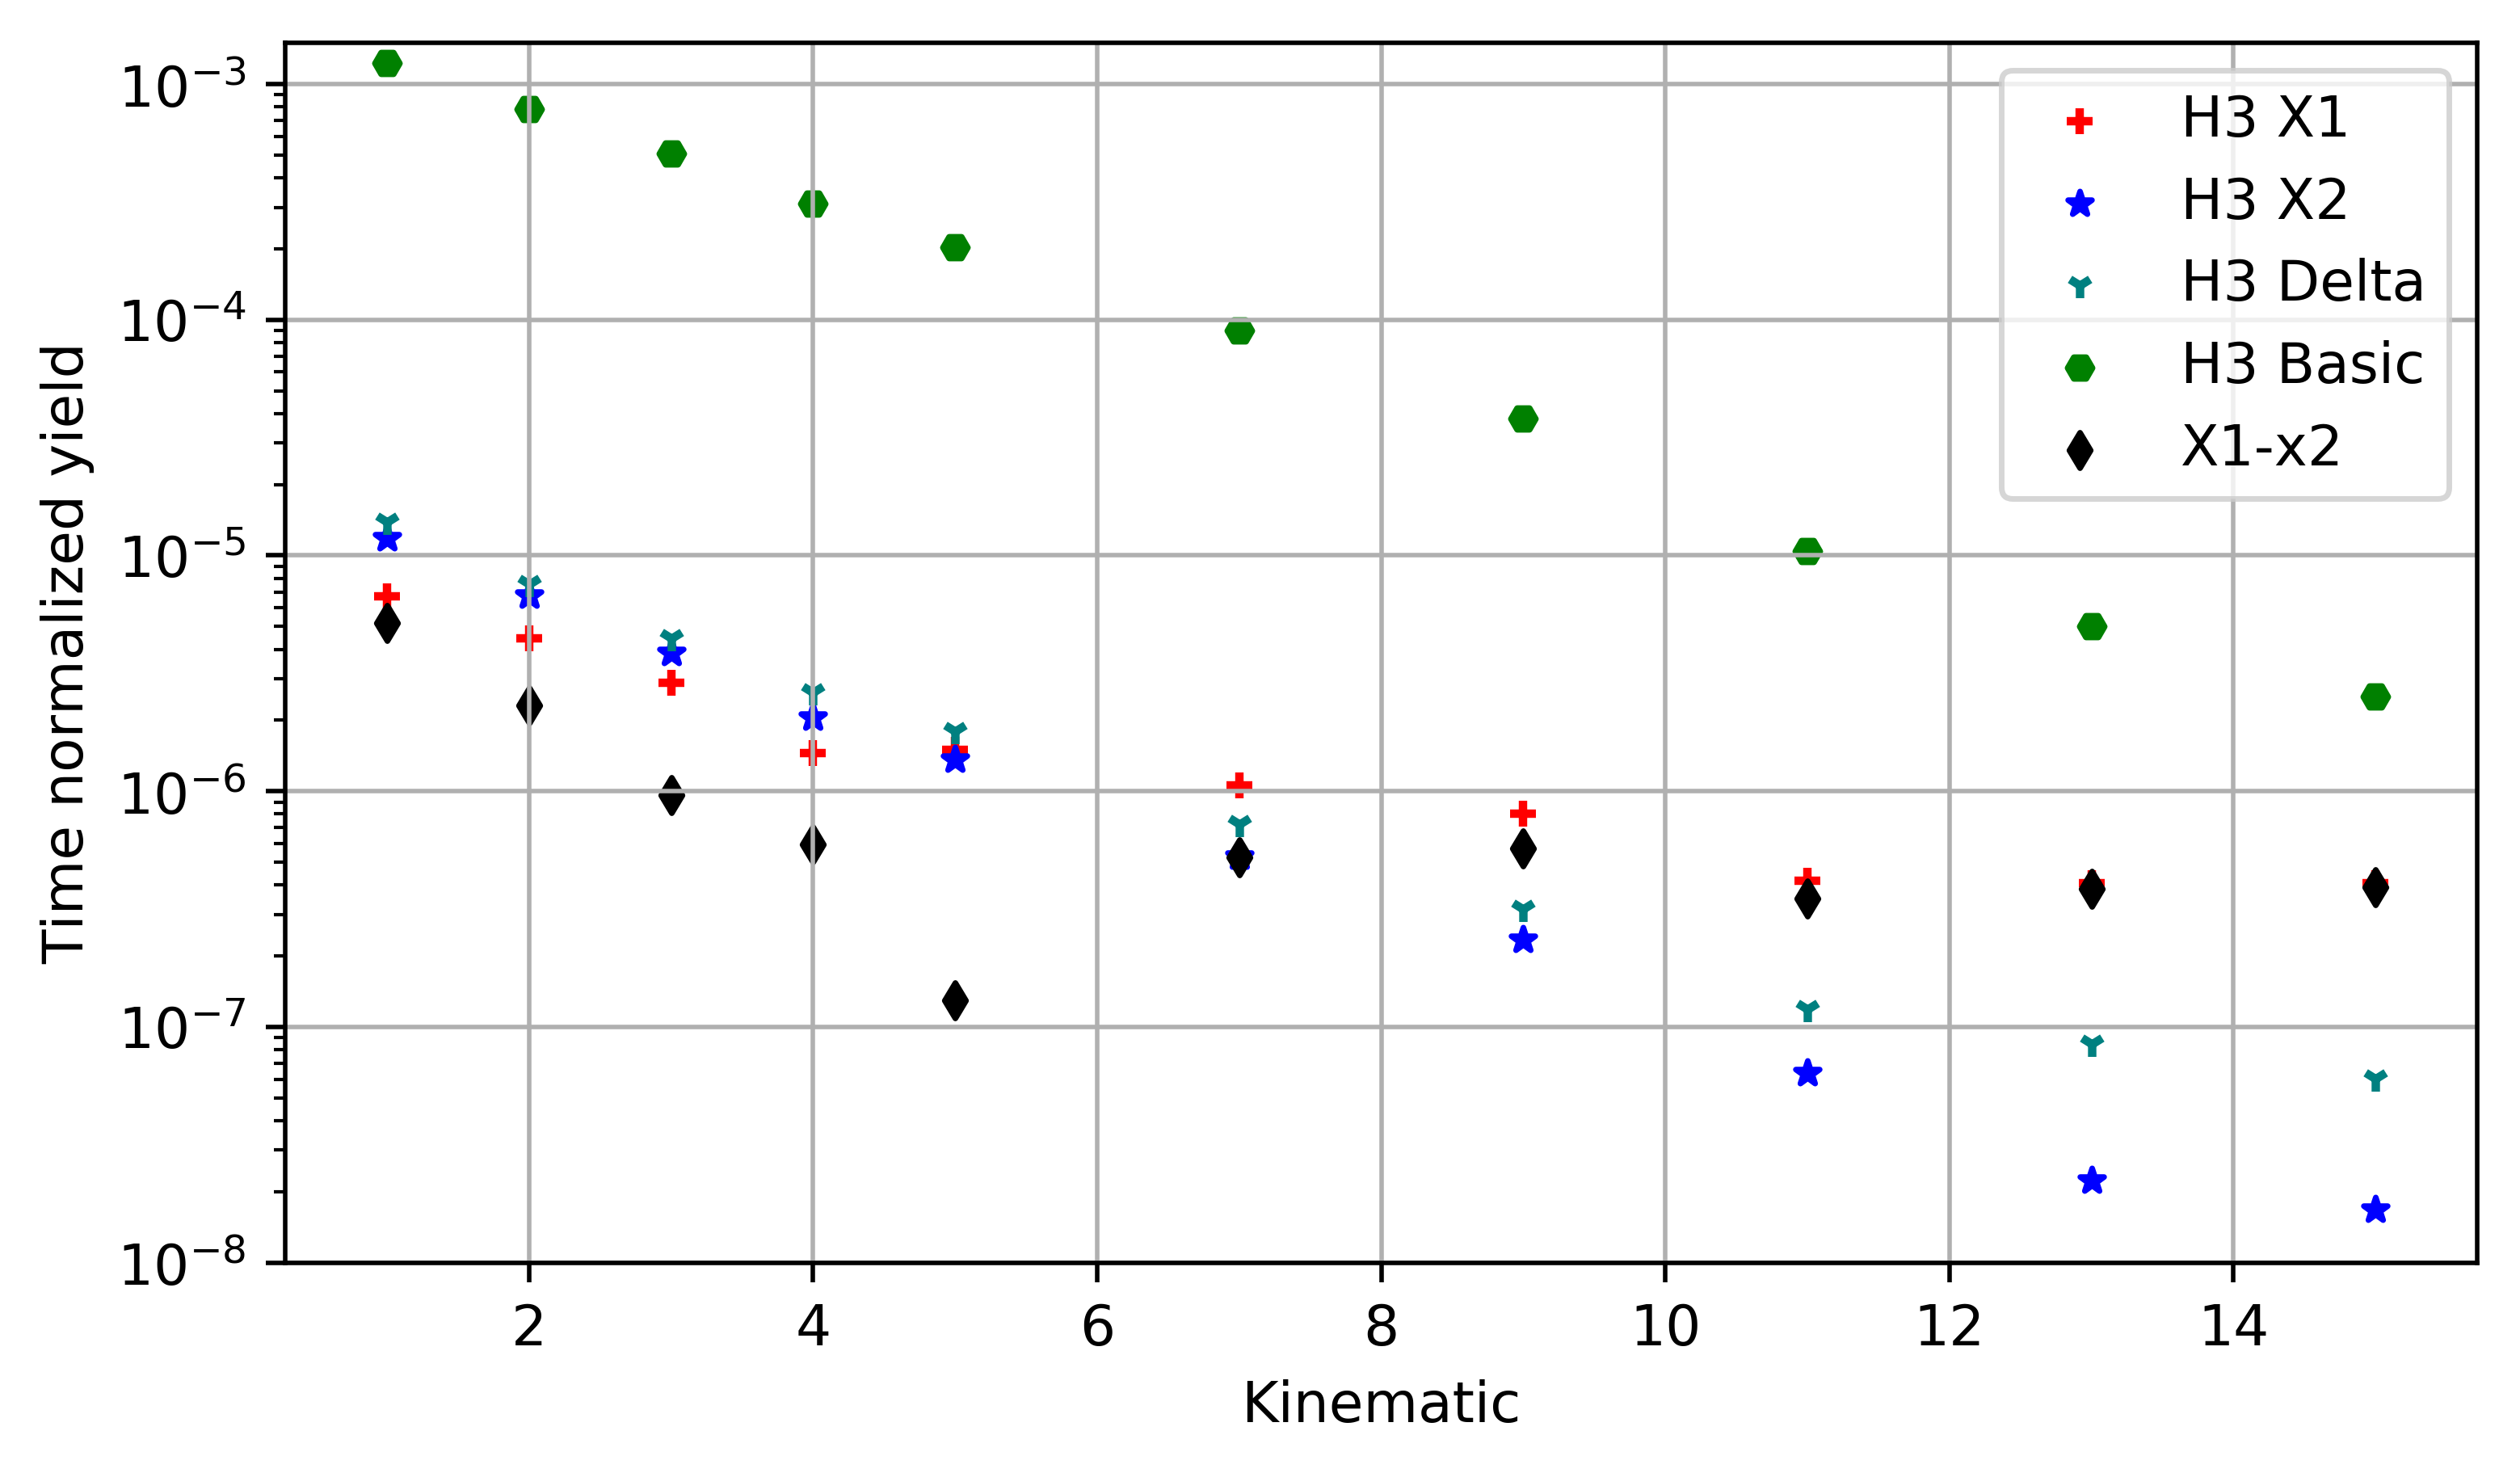

In [100]:
fig= plt.figure(dpi=500,figsize=(7,4))
x=plt.subplot(1,1,1)
H3x1.plot(ax=x, x= 'Kinematic', y='X1',yerr='x1_err', kind='Scatter', marker='+', color='r', label="H3 X1" )
H3x1.plot(ax=x, x= 'Kinematic', y='X2',yerr='x2_err', kind='Scatter', marker='*', color='b', label="H3 X2" )
H3x1.plot(ax=x, x= 'Kinematic', y='D/clk',yerr="d/clk_err", kind='Scatter', marker='1', color='teal', label="H3 Delta" )
H3x1.plot(ax=x, x= 'Kinematic', y='Basics',yerr='Basics_err', kind='Scatter', marker='H', color='g', label="H3 Basic" )
H3x1.plot(ax=x, x= 'Kinematic', y='x1_sub', kind='Scatter', marker='d', color='black', label="X1-x2" )

plt.ylim(0.00000001,0.0015)
x.set_yscale('log')
plt.grid(True)
plt.ylabel("Time normalized yield")
fig.savefig("./images/H3_x1_time.eps",bbox_inches='tight')

/home/jbane/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


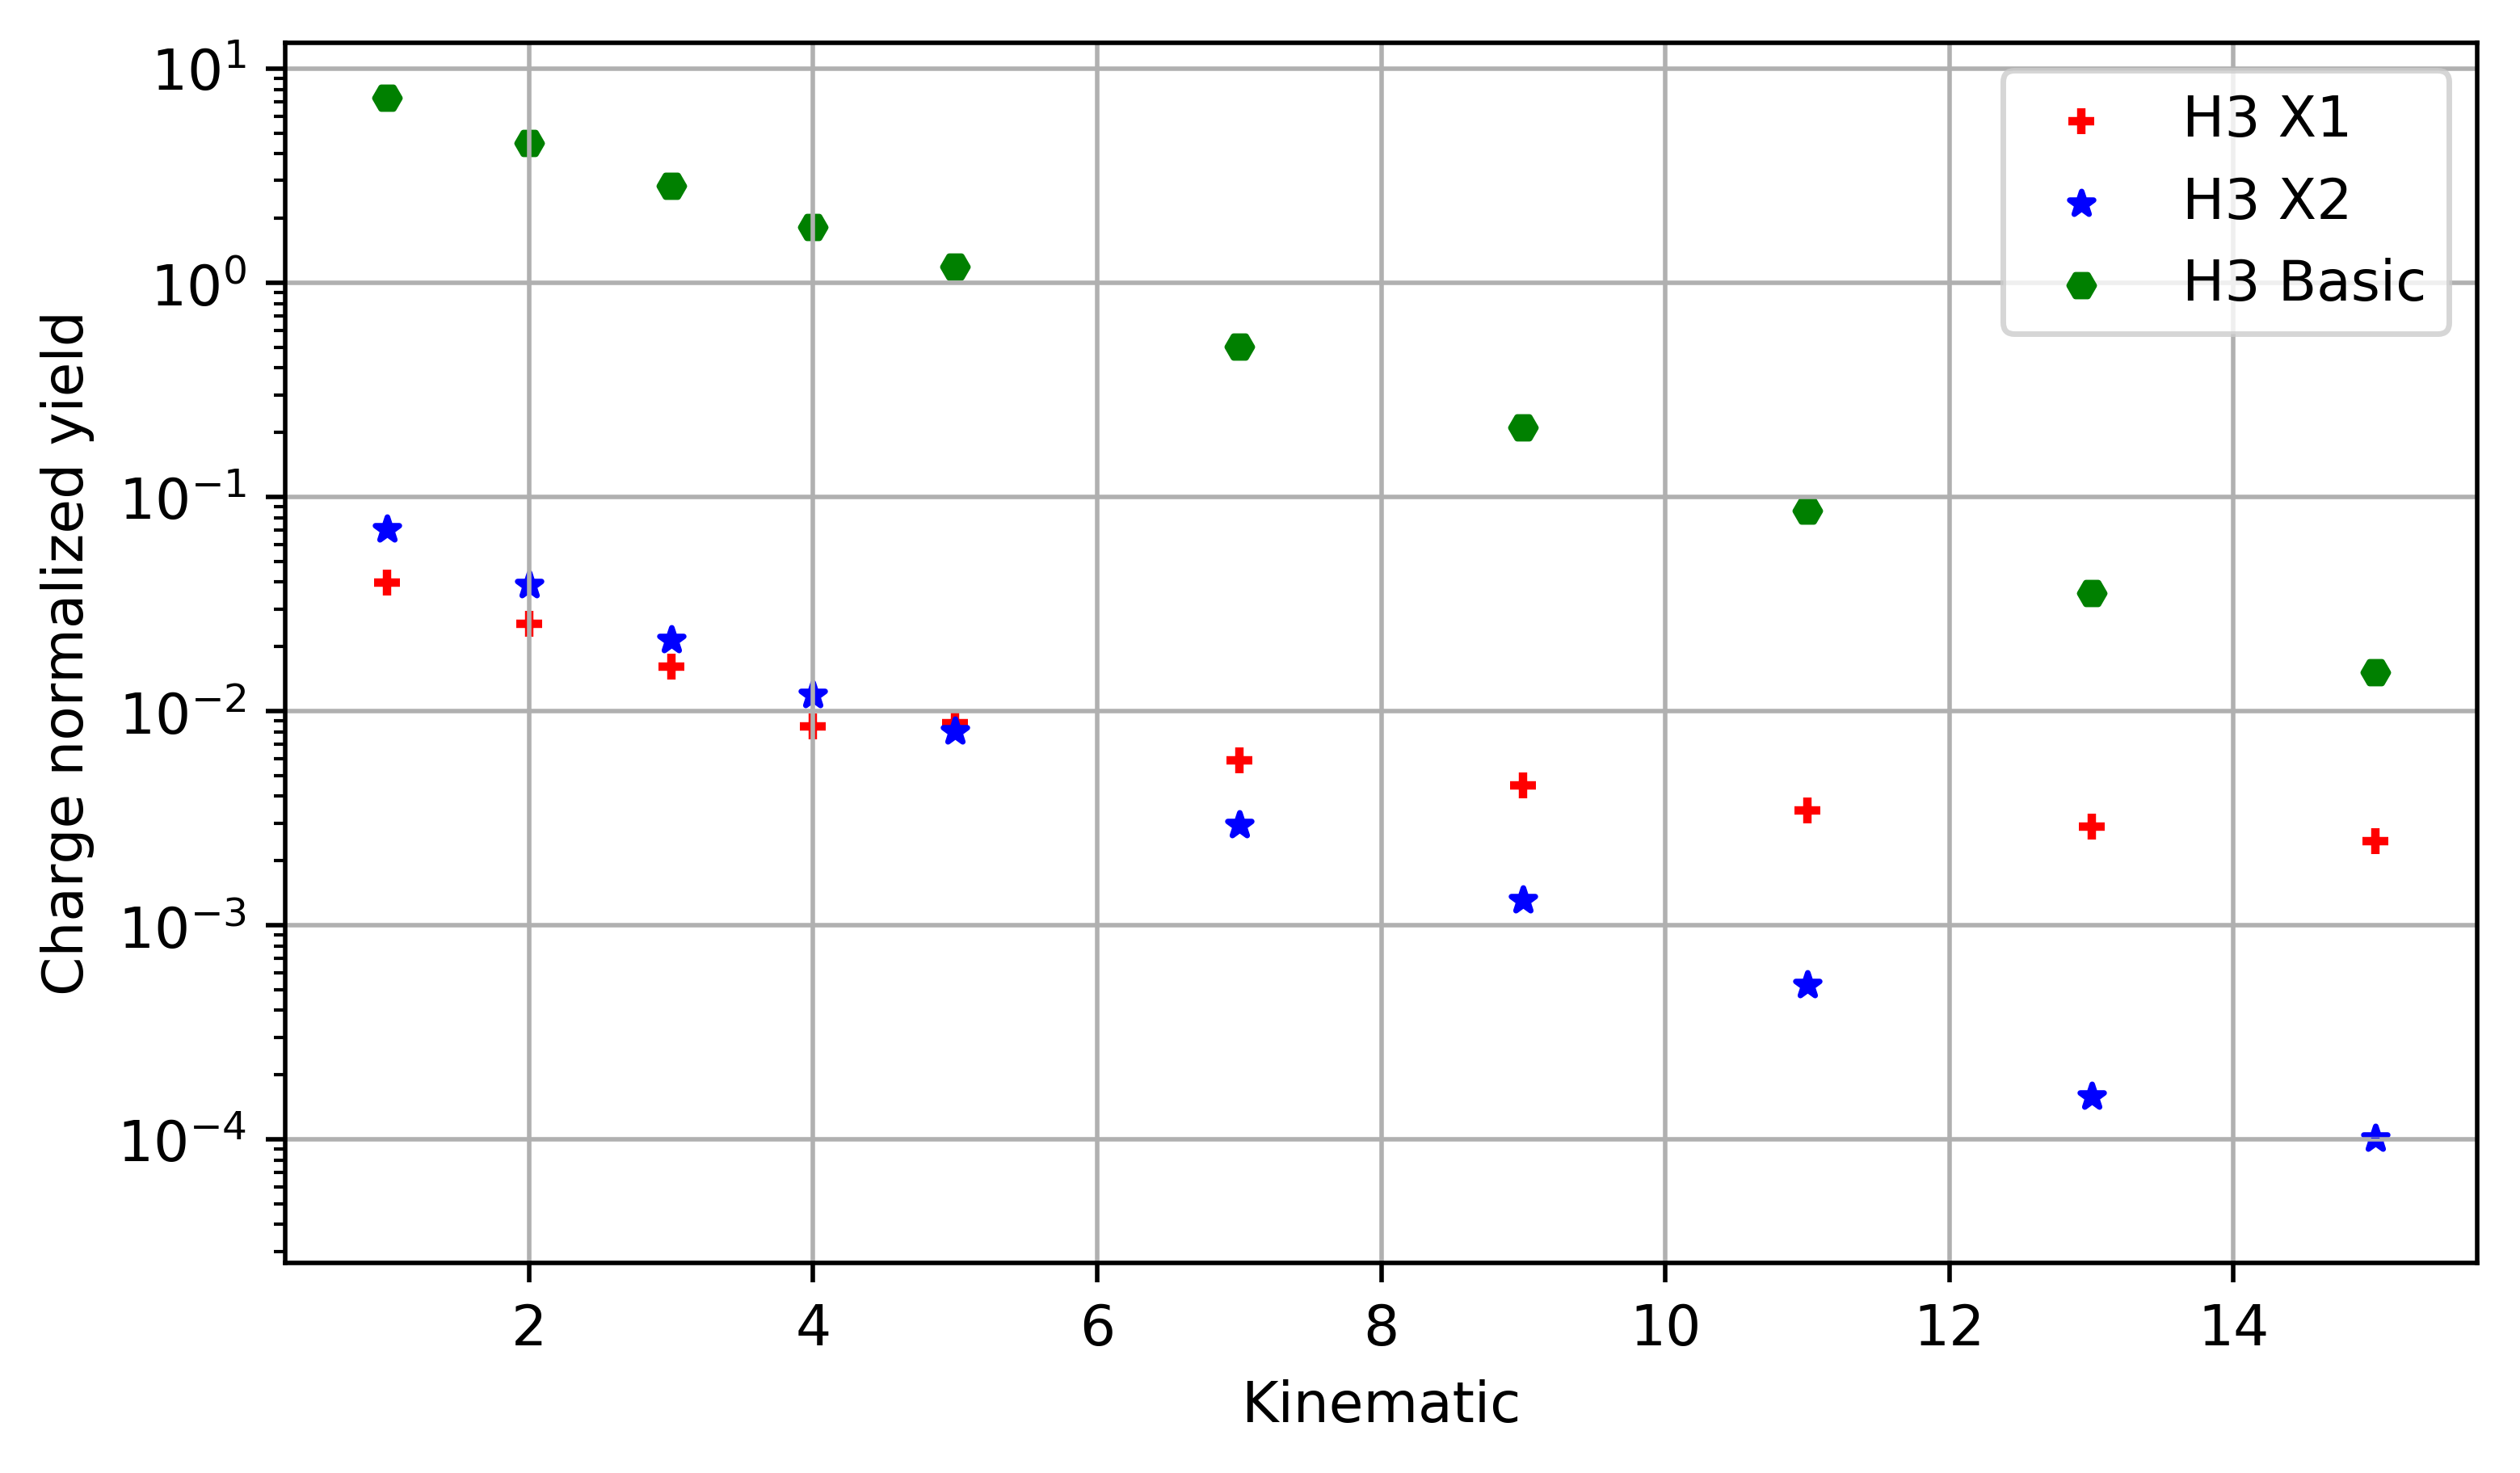

In [85]:
fig= plt.figure(dpi=500,figsize=(7,4))
x=plt.subplot(1,1,1)
H3x1.plot(ax=x, x= 'Kinematic', y='x1_charge',yerr='x1_err_ch', kind='Scatter', marker='+', color='r', label="H3 X1" )
H3x1.plot(ax=x, x= 'Kinematic', y='x2_charge',yerr='x2_err_ch', kind='Scatter', marker='*', color='b', label="H3 X2" )
H3x1.plot(ax=x, x= 'Kinematic', y='Basics_charge',yerr='Basics_err_ch', kind='Scatter', marker='H', color='g', label="H3 Basic" )


x.set_yscale('log')
plt.grid(True)
plt.ylabel("Charge normalized yield")
fig.savefig("./images/H3_x1_charge.eps",bbox_inches='tight')

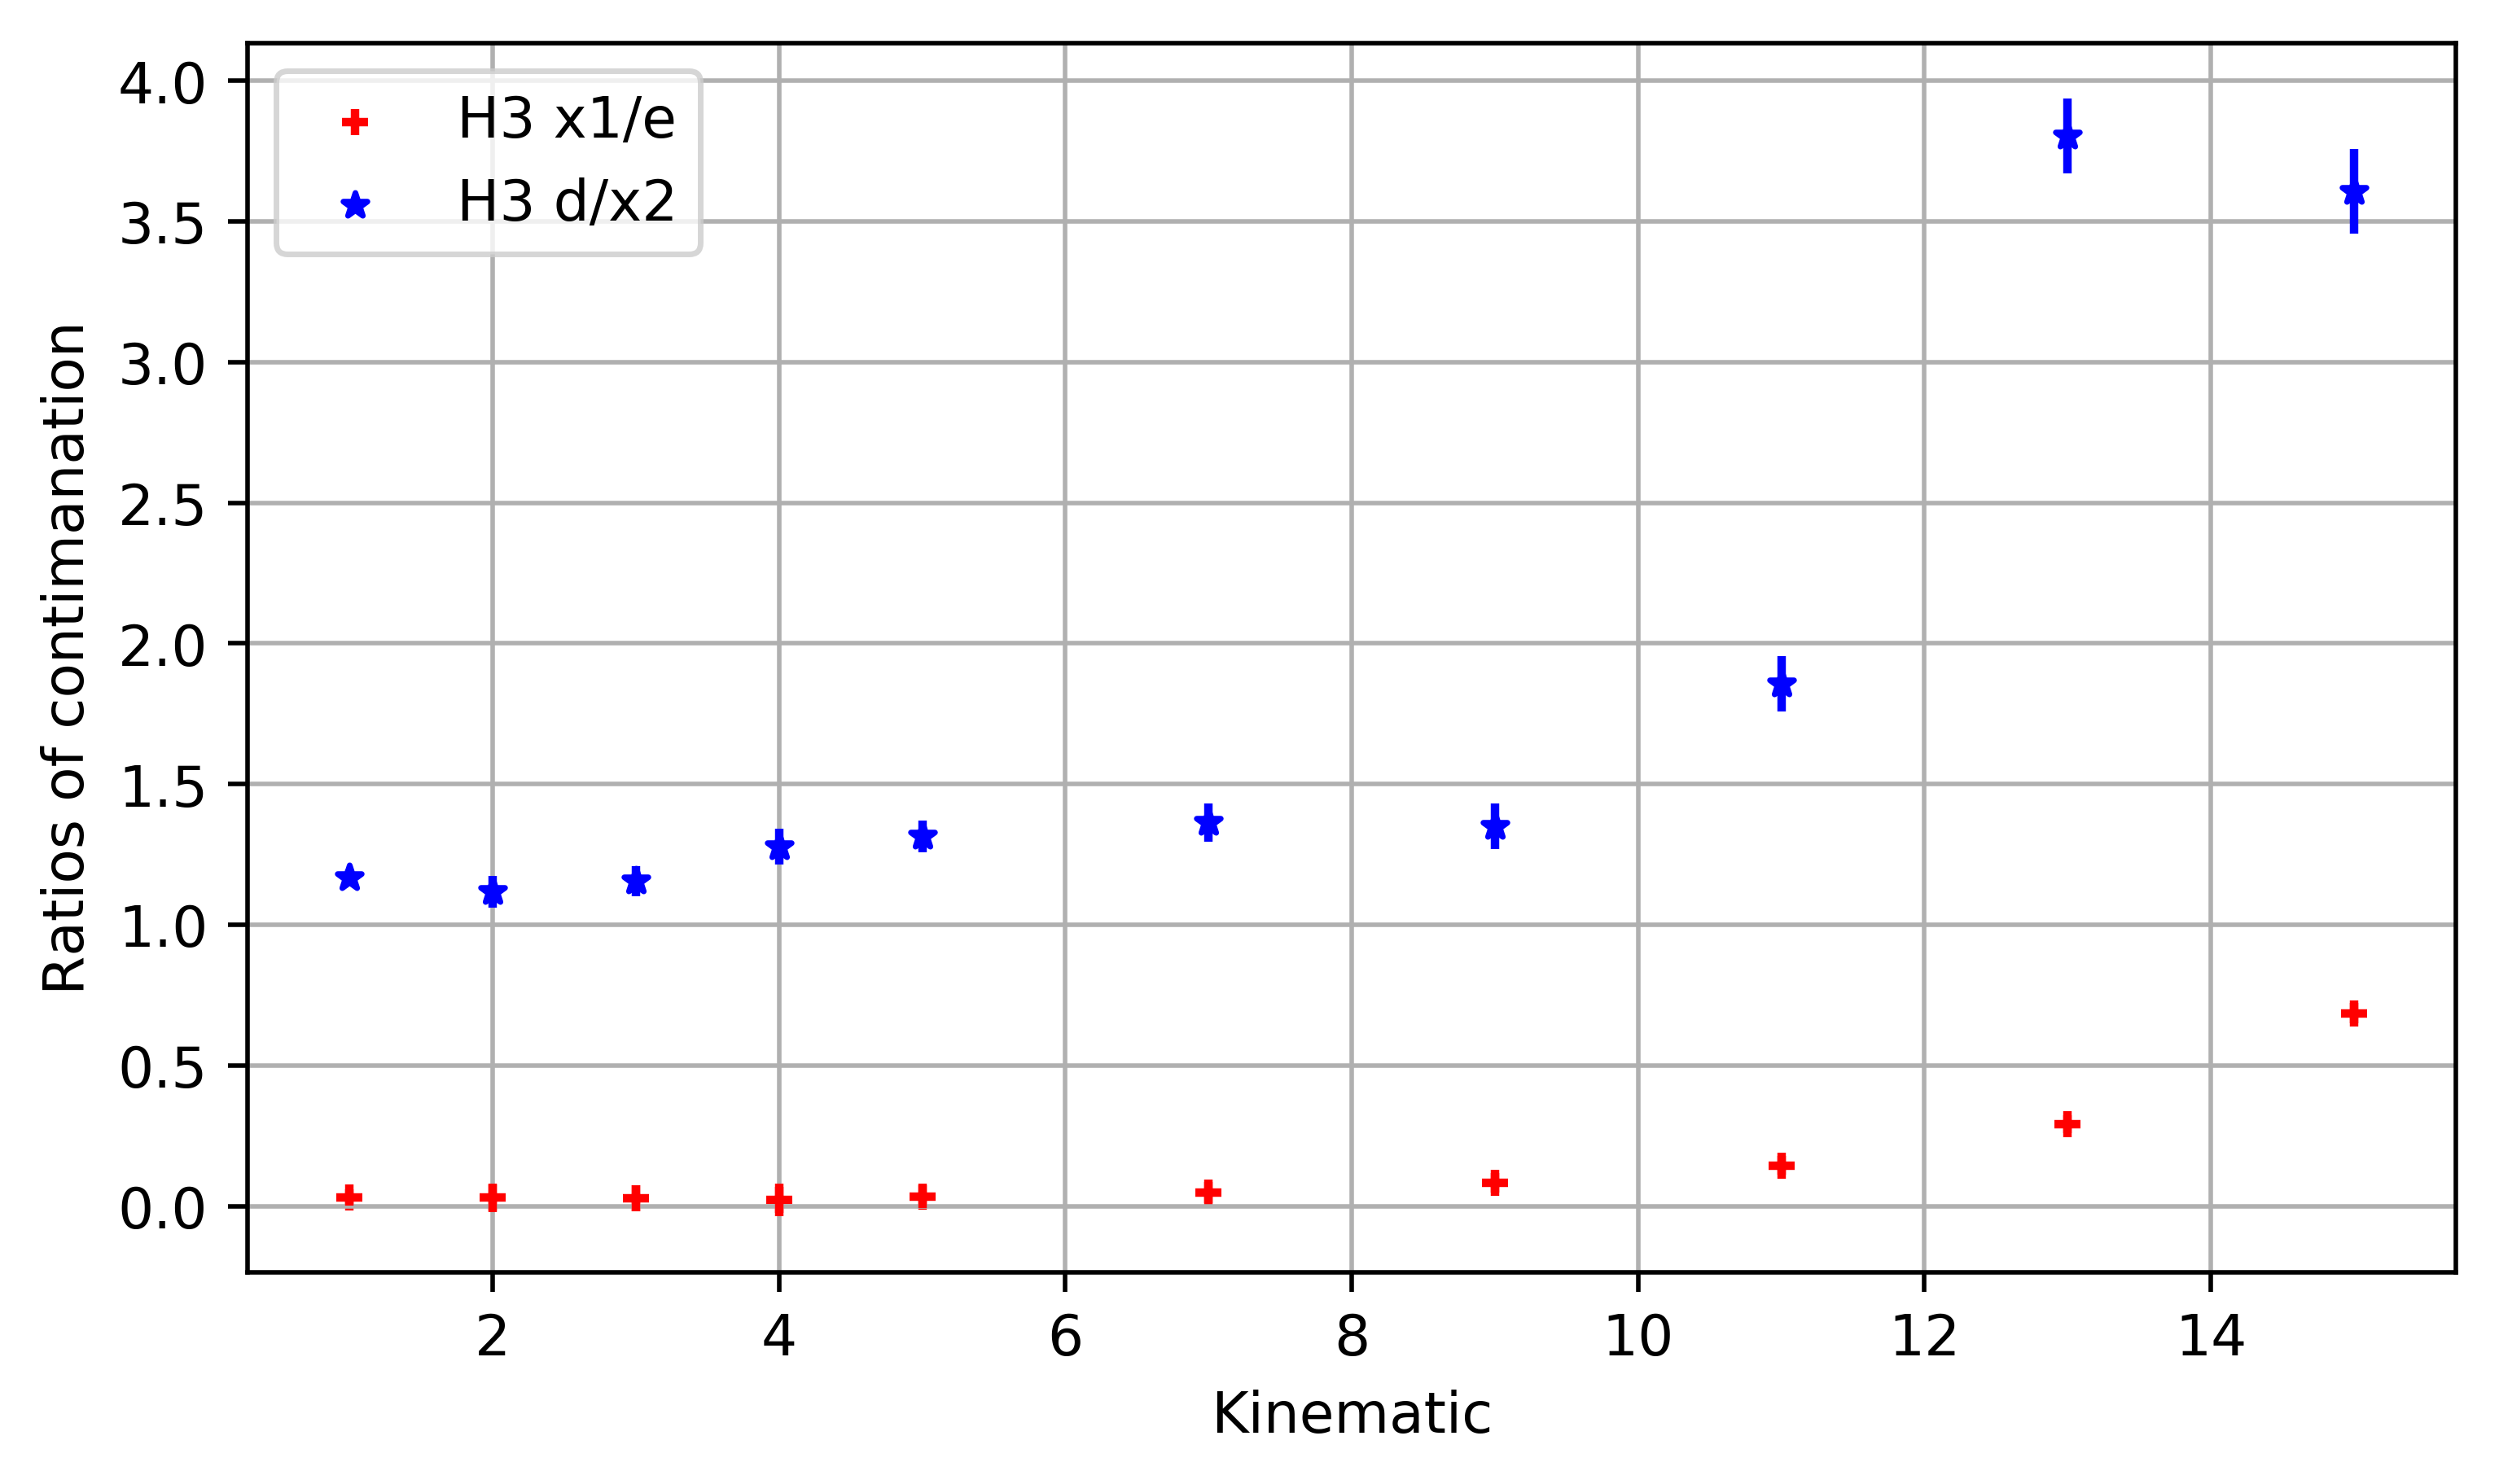

In [4]:
fig= plt.figure(dpi=500,figsize=(7,4))
x=plt.subplot(1,1,1)
H3x1.plot(ax=x, x= 'Kinematic', y='x1/e',yerr='x1/e_err', kind='Scatter', marker='+', color='r', label="H3 x1/e" )
H3x1.plot(ax=x, x= 'Kinematic', y='D/p',yerr='D/p_err', kind='Scatter', marker='*', color='b', label="H3 d/x2" )



#x.set_yscale('log')
plt.grid(True)
plt.ylabel("Ratios of contimanation")
fig.savefig("./images/H3_x1_contam.eps",bbox_inches='tight')